In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import gc
from tqdm import tqdm
from scipy.sparse import csr_matrix
from  datetime import datetime, timedelta

In [2]:
cd C:\Users\minih\python_prac1\m5\git-repository\kaggle-m5-accuracy-library\library

C:\Users\minih\python_prac1\m5\git-repository\kaggle-m5-accuracy-library\library


In [3]:
from patair import reduce_mem_usage

In [4]:
cd C:\Users\minih\python_prac1\library\m5

C:\Users\minih\python_prac1\library\m5


In [5]:
def encode_categorical(df, cols):
    
    for col in cols:
        # Leave NaN as it is.
        le = LabelEncoder()
        #not_null = df[col][df[col].notnull()]
        df[col] = df[col].fillna('nan')
        df[col] = pd.Series(le.fit_transform(df[col]), index=df.index)

    return df


#calendar = encode_categorical(
 #   calendar, ["event_name_1", "event_type_1", "event_name_2", "event_type_2"]
#).pipe(reduce_mem_usage)

In [6]:
product = pd.read_pickle("product.pickle").pipe(reduce_mem_usage)

Mem. usage decreased to  0.64 Mb (0.0% reduction)


In [7]:
product

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0
1,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0
2,HOBBIES_1_003_CA_1_validation,1439,3,1,0,0
3,HOBBIES_1_004_CA_1_validation,1440,3,1,0,0
4,HOBBIES_1_005_CA_1_validation,1441,3,1,0,0
...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,1432,2,0,9,2
30486,FOODS_3_824_WI_3_validation,1433,2,0,9,2
30487,FOODS_3_825_WI_3_validation,1434,2,0,9,2
30488,FOODS_3_826_WI_3_validation,1435,2,0,9,2


In [8]:
datas = pd.DataFrame()
for i, file in enumerate(["dataCA_1.pickle", "dataCA_2.pickle", "dataCA_3.pickle", 
             "dataCA_4.pickle", "dataTX_1.pickle", "dataTX_2.pickle", 
             "dataTX_3.pickle", "dataWI_1.pickle", "dataWI_2.pickle", "dataWI_3.pickle"]):
    data = pd.read_pickle(file).pipe(reduce_mem_usage)
    data = encode_categorical(
        data, ["item_id", "dept_id", "cat_id", "event_name_1", "event_name_2"],
    ).pipe(reduce_mem_usage)
    if(file[4:6] == "CA"):
        data["state_id"] = 0
        data = pd.merge(product[(product["state_id"] == 0) & (product["store_id"] == i)],data,how="left")
    elif(file[4:6] == "TX"):
        data["state_id"] = 1
        data = pd.merge(product[(product["state_id"] == 1) & (product["store_id"] == i)],data,how="left")
    else:
        data["state_id"] = 2
        data = pd.merge(product[(product["state_id"] == 2) & (product["store_id"] == i)],data,how="left")
    data["store_id"] = i
    datas = pd.concat([datas,data])

Mem. usage decreased to 311.61 Mb (35.1% reduction)
Mem. usage decreased to 224.77 Mb (13.7% reduction)
Mem. usage decreased to 286.09 Mb (35.1% reduction)
Mem. usage decreased to 206.36 Mb (13.7% reduction)
Mem. usage decreased to 309.91 Mb (35.1% reduction)
Mem. usage decreased to 223.54 Mb (13.7% reduction)
Mem. usage decreased to 304.85 Mb (35.1% reduction)
Mem. usage decreased to 219.89 Mb (13.7% reduction)
Mem. usage decreased to 312.07 Mb (35.1% reduction)
Mem. usage decreased to 225.10 Mb (13.7% reduction)
Mem. usage decreased to 312.50 Mb (35.1% reduction)
Mem. usage decreased to 225.41 Mb (13.7% reduction)
Mem. usage decreased to 308.88 Mb (35.1% reduction)
Mem. usage decreased to 222.80 Mb (13.7% reduction)
Mem. usage decreased to 299.41 Mb (35.6% reduction)
Mem. usage decreased to 215.28 Mb (13.9% reduction)
Mem. usage decreased to 306.52 Mb (35.1% reduction)
Mem. usage decreased to 221.10 Mb (13.7% reduction)
Mem. usage decreased to 310.48 Mb (35.1% reduction)
Mem. usage d

In [9]:
datas[(datas['date'] > '2016-04-24')][["id","date"]]

,id,date
558,HOBBIES_1_001_CA_1_validation,2016-04-25
559,HOBBIES_1_001_CA_1_validation,2016-04-26
560,HOBBIES_1_001_CA_1_validation,2016-04-27
561,HOBBIES_1_001_CA_1_validation,2016-04-28
562,HOBBIES_1_001_CA_1_validation,2016-04-29
...,...,...
2668551,FOODS_3_827_WI_3_validation,2016-06-14
2668552,FOODS_3_827_WI_3_validation,2016-06-15
2668553,FOODS_3_827_WI_3_validation,2016-06-16
2668554,FOODS_3_827_WI_3_validation,2016-06-17


In [9]:
del data
gc.collect()

20

In [10]:
datas.dtypes

id                                object
item_id                            int16
dept_id                             int8
cat_id                              int8
store_id                           int64
state_id                            int8
value                              int16
prev28                           float16
prev29                           float16
prev365                          float16
prev366                          float16
prev_28                          float16
prev_29                          float16
prev_35                          float16
prev_182                         float16
prev_365                         float16
day                                 int8
date                      datetime64[ns]
wm_yr_wk                           int16
wday                                int8
month                               int8
year                               int16
event_name_1                        int8
event_type_1                      object
event_name_2    

In [ ]:
#未売期間を切っているので"price_change_t1","rolling_price_std_t7" "rolling_price_std_t30"  "rolling_price_std_t7", "price_change_t1" "p_prev_1" このあたりは使えない
#後々最も遅く販売されたものに注目してpriceの時系列特徴を決める

In [11]:
check_feature=["prev_28","prev_29","prev_35","prev_182","prev_365","rolling_mean_t7",
               "rolling_mean_t30", "rolling_mean_t60", "rolling_mean_t90", "rolling_mean_t180",
               ]

In [12]:
#dataの時系列特徴列(prev_〇など)をみてnanを含むデータ削除する
#len(np.unique(datas.dropna(subset=check_feature)["id"]))
datas.dropna(subset=check_feature, inplace=True)

In [13]:
#WRMSSEの計算用(kernelより)

NUM_ITEMS = 30490
DAYS_PRED = 28

weight_mat = np.c_[np.ones([NUM_ITEMS,1]).astype(np.int8), # level 1
                   pd.get_dummies(product.state_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.store_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.cat_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.dept_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.state_id.astype(str) + product.cat_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.state_id.astype(str) + product.dept_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.store_id.astype(str) + product.cat_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.store_id.astype(str) + product.dept_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.item_id.astype(str),drop_first=False).astype('int8').values,
                   pd.get_dummies(product.state_id.astype(str) + product.item_id.astype(str),drop_first=False).astype('int8').values,
                   np.identity(NUM_ITEMS).astype(np.int8) #item :level 12
                   ].T

weight_mat_csr = csr_matrix(weight_mat)
del weight_mat; gc.collect()

def weight_calc(data,product):
    
    # calculate the denominator of RMSSE, and calculate the weight base on sales amount

    sales_train_val = pd.read_csv('sales_train_validation.csv')

    d_name = ['d_' + str(i+1) for i in range(1913)]

    sales_train_val = weight_mat_csr * sales_train_val[d_name].values

    # calculate the start position(first non-zero demand observed date) for each item / 商品の最初の売上日
    # 1-1914のdayの数列のうち, 売上が存在しない日を一旦0にし、0を9999に置換。そのうえでminimum numberを計算
    df_tmp = ((sales_train_val>0) * np.tile(np.arange(1,1914),(weight_mat_csr.shape[0],1)))

    start_no = np.min(np.where(df_tmp==0,9999,df_tmp),axis=1)-1

    flag = np.dot(np.diag(1/(start_no+1)) , np.tile(np.arange(1,1914),(weight_mat_csr.shape[0],1)))<1

    sales_train_val = np.where(flag,np.nan,sales_train_val)

    # denominator of RMSSE / RMSSEの分母
    weight1 = np.nansum(np.diff(sales_train_val,axis=1)**2,axis=1)/(1913-start_no)

    # calculate the sales amount for each item/level
    df_tmp = data[(data['date'] > '2016-03-27') & (data['date'] <= '2016-04-24')]
    df_tmp['value'] = df_tmp['value'] * df_tmp['sell_price']
    df_tmp =df_tmp.groupby(['id'])['value'].apply(np.sum)
    df_tmp = df_tmp[product.id].values
    
    weight2 = weight_mat_csr * df_tmp 

    weight2 = weight2/np.sum(weight2)

    del sales_train_val
    gc.collect()
    
    return weight1, weight2

weight1, weight2 = weight_calc(datas,product)

def wrmsse(preds, data):
    
    # this function is calculate for last 28 days to consider the non-zero demand period
    
    # actual obserbed values / 正解ラベル
    y_true = data.get_label()
    
    y_true = y_true[-(NUM_ITEMS * DAYS_PRED):]
    preds = preds[-(NUM_ITEMS * DAYS_PRED):]
    # number of columns
    num_col = DAYS_PRED
    
    # reshape data to original array((NUM_ITEMS*num_col,1)->(NUM_ITEMS, num_col) ) / 推論の結果が 1 次元の配列になっているので直す
    reshaped_preds = preds.reshape(num_col, NUM_ITEMS).T
    reshaped_true = y_true.reshape(num_col, NUM_ITEMS).T
    
          
    train = weight_mat_csr*np.c_[reshaped_preds, reshaped_true]
    
    score = np.sum(
                np.sqrt(
                    np.mean(
                        np.square(
                            train[:,:num_col] - train[:,num_col:])
                        ,axis=1) / weight1) * weight2)
    
    return 'wrmsse', score, False

def wrmsse_simple(preds, data):
    
    # actual obserbed values / 正解ラベル
    y_true = data.get_label()
    
    y_true = y_true[-(NUM_ITEMS * DAYS_PRED):]
    preds = preds[-(NUM_ITEMS * DAYS_PRED):]
    # number of columns
    num_col = DAYS_PRED
    
    # reshape data to original array((NUM_ITEMS*num_col,1)->(NUM_ITEMS, num_col) ) / 推論の結果が 1 次元の配列になっているので直す
    reshaped_preds = preds.reshape(num_col, NUM_ITEMS).T
    reshaped_true = y_true.reshape(num_col, NUM_ITEMS).T
          
    train = np.c_[reshaped_preds, reshaped_true]
    
    weight2_2 = weight2[:NUM_ITEMS]
    weight2_2 = weight2_2/np.sum(weight2_2)
    
    score = np.sum(
                np.sqrt(
                    np.mean(
                        np.square(
                            train[:,:num_col] - train[:,num_col:])
                        ,axis=1) /  weight1[:NUM_ITEMS])*weight2_2)
    
    return 'wrmsse', score, False

C:\Users\minih\anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
#訓練,検証,テストに分割(訓練-検証28日-テスト28日の並びで取得)
x_train = datas[datas['date'] <= '2016-03-27']
y_train = x_train['value']
x_val = datas[(datas['date'] > '2016-03-27') & (datas['date'] <= '2016-04-24')]
y_val = x_val['value']
test = datas[(datas['date'] > '2016-04-24')]
del datas
gc.collect()

20

In [11]:
val_pred = pd.read_csv("val_pred.csv")["0"]

In [12]:
val_pred

0         0.844328
1         0.843772
2         0.797734
3         0.807137
4         0.911495
            ...   
853715    1.524582
853716    1.514664
853717    1.773846
853718    1.915698
853719    2.180953
Name: 0, Length: 853720, dtype: float64

In [21]:
val_pred = np.array(val_pred)

In [22]:
x_val["predict"] = val_pred

In [24]:
x_val

,id,item_id,dept_id,cat_id,store_id,state_id,value,prev_28,prev_29,prev_35,...,is_year_end,is_year_start,is_quarter_end,is_quarter_start,is_month_end,is_month_start,is_weekend,snap_TX,snap_WI,predict
530,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,1,0.0,2.0,4.0,...,0,0,0,0,0,0,0,NaN,NaN,0.844328
531,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0.843772
532,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0.797734
533,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,1.0,0.0,0.0,...,0,0,1,0,1,0,0,NaN,NaN,0.807137
534,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,1.0,1.0,1.0,...,0,0,0,1,0,1,0,NaN,NaN,0.911495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668496,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,5.0,0.0,3.0,...,0,0,0,0,0,0,0,NaN,0.0,1.524582
2668497,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,3.0,5.0,3.0,...,0,0,0,0,0,0,0,NaN,0.0,1.514664
2668498,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,NaN,0.0,1.773846
2668499,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,NaN,0.0,1.915698


In [18]:
x_val

,id,item_id,dept_id,cat_id,store_id,state_id,value,prev_28,prev_29,prev_35,...,is_year_end,is_year_start,is_quarter_end,is_quarter_start,is_month_end,is_month_start,is_weekend,snap_TX,snap_WI,predict
530,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,1,0.0,2.0,4.0,...,0,0,0,0,0,0,0,NaN,NaN,6.562129
531,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,6.318951
532,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,0.0,2.0,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0.257591
533,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,1.0,0.0,0.0,...,0,0,1,0,1,0,0,NaN,NaN,0.257591
534,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,0,1.0,1.0,1.0,...,0,0,0,1,0,1,0,NaN,NaN,0.255378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668496,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,5.0,0.0,3.0,...,0,0,0,0,0,0,0,NaN,0.0,NaN
2668497,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,3.0,5.0,3.0,...,0,0,0,0,0,0,0,NaN,0.0,NaN
2668498,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,NaN,0.0,NaN
2668499,FOODS_3_827_WI_3_validation,1436,2,0,9,2,0,0.0,2.0,1.0,...,0,0,0,0,0,0,1,NaN,0.0,NaN


In [25]:
x_val[["id",'item_id', 'dept_id', 'cat_id', 'store_id','state_id', 'date', 'wm_yr_wk',"value","predict"]].to_csv("lgb_result.csv")

In [16]:
x_train.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'value',
       'prev28', 'prev29', 'prev365', 'prev366', 'prev_28', 'prev_29',
       'prev_35', 'prev_182', 'prev_365', 'day', 'date', 'wm_yr_wk', 'wday',
       'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'sell_price', 'p_prev_1', 'rolling_mean_t7',
       'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90',
       'rolling_mean_t180', 'price_change_t1', 'rolling_price_max_t365',
       'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30',
       'quarter', 'week', 'dayofweek', 'is_year_end', 'is_year_start',
       'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start',
       'is_weekend', 'snap_TX', 'snap_WI'],
      dtype='object')

In [15]:
features = [
   #訓練に用いる特徴量をここに記述
    "item_id",
    "dept_id",
    "cat_id",
    "store_id",
    "state_id",
    "event_name_1",
    #"event_type_1",
    "event_name_2",
    #"event_type_2",
    
    
    #"snap_CA",
    #"snap_TX",
    #"snap_WI",
    "sell_price",
    # demand features.
    'prev_28', 
    'prev_29', 
    'prev_35',
    'prev_182', 
    'prev_365', 
    #'p_prev_1', 
    'rolling_mean_t7',
    'rolling_mean_t30', 
    'rolling_mean_t60', 
    'rolling_mean_t90',
    'rolling_mean_t180',  
    # price features
    #"price_change_t1",
    #"price_change_t365",
    #'rolling_price_max_t365', 
    #'price_change_t365',
    #"rolling_price_std_t7",
    #"rolling_price_std_t30",
    # time features.
    "year",
    "month",
    "week",
    "day",
    "dayofweek",
    "is_year_end",
    "is_year_start",
    "is_quarter_end",
    "is_quarter_start",
    "is_month_end",
    "is_month_start",
    "is_weekend",
]

train_set = lgb.Dataset(x_train[features], y_train)
val_set = lgb.Dataset(x_val[features], y_val)

del x_train, y_train

In [16]:
len(y_val)

853720

In [19]:
#kernelから取ってきたパラメータ
params = {
        "objective" : "poisson",
        "metric" :"custom",
        "force_row_wise" : True,
        "learning_rate" : 0.075,
        "sub_row" : 0.75,
        "bagging_freq" : 1,
        "lambda_l2" : 0.1,
#         "nthread" : 4
    'verbosity': 1,
    'num_iterations' : 1200,
    'num_leaves': 128,
    "min_data_in_leaf": 100,
    "random_state": 32,
}

In [ ]:
#random_state
random_state=32

In [20]:
#訓練
model = lgb.train(params, train_set, early_stopping_rounds = 50,
                  valid_sets = [train_set, val_set], categorical_feature = ["item_id","dept_id","cat_id","store_id","state_id","event_name_1","event_name_2"], verbose_eval = 100, feval= wrmsse)
#カテゴリ変数は、エンコードしたかに関わらず明示しておいた方が良さそう

C:\Users\minih\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\minih\anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_id', 'dept_id', 'event_name_1', 'event_name_2', 'item_id', 'state_id', 'store_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds
[100]	training's wrmsse: 1.11315	valid_1's wrmsse: 0.71925
Early stopping, best iteration is:
[109]	training's wrmsse: 1.08394	valid_1's wrmsse: 0.715176


In [21]:
#いちおうR値でも精度を検証
#予測
val_pred = model.predict(x_val[features])

In [22]:
#R値
r2_score(val_pred,y_val)

0.3766827315910052

No handles with labels found to put in legend.


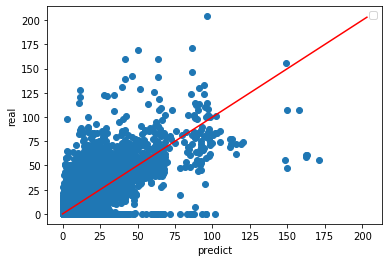

In [23]:
#R値グラフの表示
max_val = np.max(val_pred)
if max_val < np.max(y_val):
    max_val = np.max(y_val)

plt.scatter(val_pred,y_val)
plt.plot(np.arange(0,max_val),np.arange(0,max_val),color='red')
plt.xlabel("predict")
plt.ylabel("real")
plt.legend()

In [24]:
test = test[test["date"] <= "2016-05-22"]

In [25]:
len(test)

853720

In [26]:
#テストデータを用いて予測
y_pred = model.predict(test[features])
test['demand'] = y_pred

C:\Users\minih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
test.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'value',
       'prev_28', 'prev_29', 'prev_35', 'prev_182', 'prev_365',
       'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60',
       'rolling_mean_t90', 'rolling_mean_t180', 'day', 'date', 'wm_yr_wk',
       'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'sell_price', 'quarter', 'week', 'dayofweek',
       'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start',
       'is_month_end', 'is_month_start', 'is_weekend', 'snap_TX', 'snap_WI',
       'demand'],
      dtype='object')

In [31]:
len(y_pred)

853720

In [32]:
#提出用ファイルを読み込む
submission = pd.read_csv('sample_submission.csv')

In [33]:
test["date"]

558       2016-04-25
559       2016-04-26
560       2016-04-27
561       2016-04-28
562       2016-04-29
             ...    
2668524   2016-05-18
2668525   2016-05-19
2668526   2016-05-20
2668527   2016-05-21
2668528   2016-05-22
Name: date, Length: 853720, dtype: datetime64[ns]

In [34]:
#予測値を提出用ファイルに整形
predictions = test[['id', 'date', 'demand']]
predictions = pd.pivot(predictions, index = 'id', columns = 'date', values = 'demand').reset_index()
predictions.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]

evaluation_rows = [row for row in submission['id'] if 'evaluation' in row] 
evaluation = submission[submission['id'].isin(evaluation_rows)]

validation = submission[['id']].merge(predictions, on = 'id')
final = pd.concat([validation, evaluation])

In [35]:
#finalが提出形式のdfなので、これをto_csvする
final.to_csv('create1.csv', index = False)